In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 数据读入啦

In [3]:
f = open('magic04.txt')
data = []
y=[]
for i in f.read().split():
    data.append([float(j)for j in i.split(',')[:-1]])
    y.append(i.split(',')[-1]=='g')

## 初始数据处理

In [4]:
data = np.array(data) # 原始数据
n = data.shape[0] # 样本个数
m = data.shape[1] # 样本维数


## 1. 均值

In [5]:
mean = np.mean(data,axis=0)
mean

array([ 53.25015393,  22.18096622,   2.82501696,   0.38032707,
         0.21465713,  -4.33174516,  10.54554482,   0.24972596,
        27.64570668, 193.81802647])

## 中心化

In [6]:
z = data - np.ones([n,1])*mean

## 2. 样本均方差 - 1

In [8]:
scm1 = np.dot(z.T,z)/n
scm1

array([[ 1.79468657e+03,  5.98832056e+02,  1.40634899e+01,
        -4.88673783e+00, -2.80023307e+00, -9.24385500e+02,
        -2.58713552e+02,  1.18133866e+01, -9.70630726e+00,
         1.32479447e+03],
       [ 5.98832056e+02,  3.36560086e+02,  6.22077467e+00,
        -2.04502933e+00, -1.17816446e+00, -2.89957100e+02,
        -1.64885064e+02,  1.51852884e+01,  3.16350305e+01,
         4.61761921e+02],
       [ 1.40634899e+01,  6.22077467e+00,  2.23337740e-01,
        -7.35072146e-02, -4.22410108e-02, -4.47284297e+00,
         2.29341395e+00,  1.52113339e-01, -2.30280376e+00,
         1.54346558e+01],
       [-4.88673783e+00, -2.04502933e+00, -7.35072146e-02,
         3.34188897e-02,  1.97252425e-02,  1.21513100e+00,
        -1.13646775e+00, -4.30002400e-02,  1.12267849e+00,
        -4.48542469e+00],
       [-2.80023307e+00, -1.17816446e+00, -4.22410108e-02,
         1.97252425e-02,  1.22119946e-02,  6.55298229e-01,
        -6.69353952e-01, -2.52377277e-02,  6.62872326e-01,
        -2.

## 3. 样本均方差 - 2

In [74]:
result = np.zeros([10,10])
for zi in z:
    zi = np.array([zi.T])
    result += zi*zi.T
scm2 = result/n

## 4. 属性1和属性2的余弦相似度

In [82]:
a1 = z[:,0]
a2 = z[:,1]
c = a1.dot(a2)/(a1.dot(a1)*a2.dot(a2))
c

5.21246684085933e-08

## 4.1 散点图

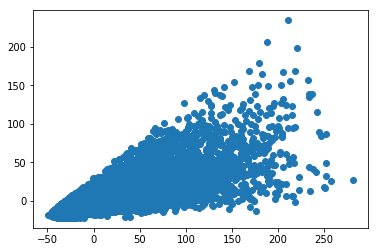

In [86]:
plt.scatter(a1,a2)  

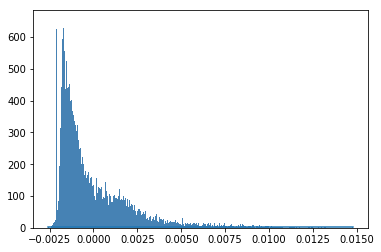

In [104]:
mu, sigma = 0, .1
count, bins, _ = plt.hist(a1/n, bins=500, color='steelblue',density=True)

## 方差

In [112]:
vars = [(np.var(z[:,i])) for i in range(m)]

## 最小的方差

In [128]:
np.where(vars == np.min(vars))[0][0]

4

## 最大的方差

In [129]:
np.where(vars == np.max(vars))[0][0]

9

## 协方差

In [135]:
cov = {
    
}
for i in range(m):
    for j in range(m):
        if i >= j:continue
        cov[''+str(i)+'-'+str(j)]=np.cov(z[:,i],z[:,j])[0][1]

In [145]:
max_cov = min_cov = '0-1'
for (key,value) in  cov.items():
    if value > cov[max_cov]:
        max_cov=key
    if value < cov[min_cov]:
        min_cov=key

'0-9'

## 最大

In [147]:
max_cov

'0-9'

## 最小

In [148]:
min_cov

'0-5'

In [149]:
data

array([[ 28.7967,  16.0021,   2.6449, ...,  -8.2027,  40.092 ,  81.8828],
       [ 31.6036,  11.7235,   2.5185, ...,  -9.9574,   6.3609, 205.261 ],
       [162.052 , 136.031 ,   4.0612, ..., -45.216 ,  76.96  , 256.788 ],
       ...,
       [ 75.4455,  47.5305,   3.4483, ...,  -9.4662,  30.2987, 256.5166],
       [120.5135,  76.9018,   3.9939, ..., -63.8389,  84.6874, 408.3166],
       [187.1814,  53.0014,   3.2093, ...,  31.4755,  52.731 , 272.3174]])